In [1]:
#%pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

data = pd.read_csv("train.csv")


In [3]:
data.describe()

,acoustic_data,time_to_failure
count,6.291455e+08,6.291455e+08
mean,4.519468e+00,5.678292e+00
std,1.073571e+01,3.672697e+00
min,-5.515000e+03,9.550396e-05
25%,2.000000e+00,2.625997e+00
50%,5.000000e+00,5.349798e+00
75%,7.000000e+00,8.173396e+00
max,5.444000e+03,1.610740e+01


In [2]:

rand_sample = data.sample(n=1000)

In [11]:
len(data)

629145480

In [17]:
cont_sample = pd.DataFrame()
entries = []
for i in range(0, len(data), 629145):
    cont_sample = pd.concat([cont_sample, pd.DataFrame([data.loc[i]])], ignore_index=True)

In [3]:
#rand_sample.to_csv(path_or_buf="train_sample_rand_1000")

In [18]:
cont_sample.to_csv(path_or_buf="train_sample_cont_1000")

In [4]:
data.head()

,acoustic_data,time_to_failure
0,12,1.4691
1,6,1.4691
2,8,1.4691
3,5,1.4691
4,8,1.4691


In [5]:
data.tail()

,acoustic_data,time_to_failure
629145475,7,9.759796
629145476,9,9.759796
629145477,10,9.759796
629145478,6,9.759796
629145479,5,9.759796


In [5]:
rand_sample.describe()

,acoustic_data,time_to_failure
count,1000.000000,1000.000000
mean,4.460000,5.583329
std,5.359769,3.693316
min,-62.000000,0.010899
25%,2.000000,2.616874
50%,5.000000,5.116548
75%,7.000000,8.082321
max,52.000000,15.756298


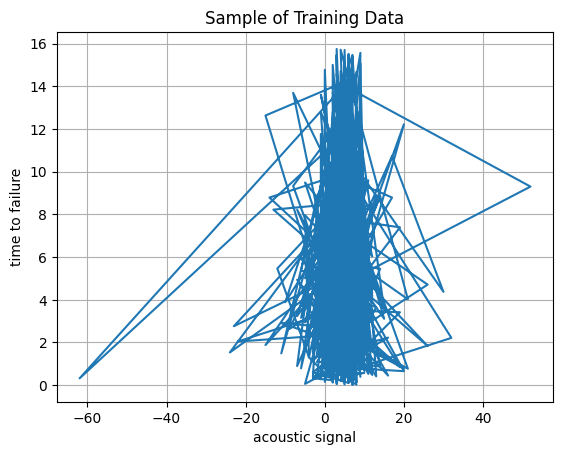

In [7]:

plt.plot(rand_sample['acoustic_data'], rand_sample['time_to_failure'])
plt.title('Sample of Training Data')
plt.xlabel('acoustic signal')
plt.ylabel('time to failure')
plt.grid(True)
plt.show()

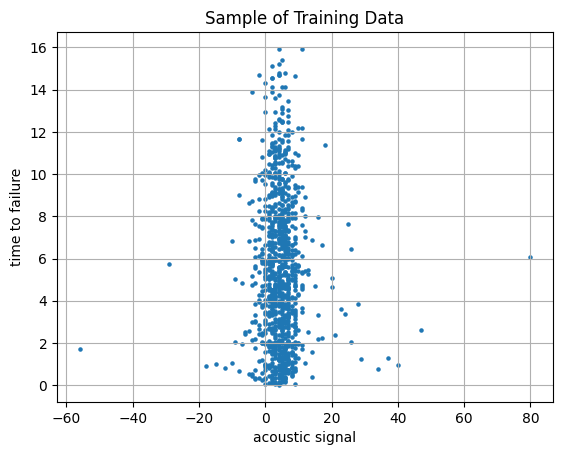

In [20]:
# Plotting the DataFrame
plt.scatter(rand_sample['acoustic_data'], rand_sample['time_to_failure'], s=5)
plt.title('Sample of Training Data')
plt.xlabel('acoustic signal')
plt.ylabel('time to failure')
plt.grid(True)
plt.show()

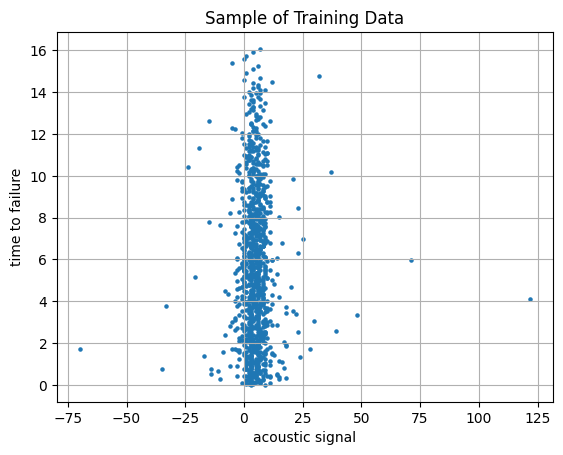

In [19]:
# Plotting the DataFrame
plt.scatter(cont_sample['acoustic_data'], cont_sample['time_to_failure'], s=5)
plt.title('Sample of Training Data')
plt.xlabel('acoustic signal')
plt.ylabel('time to failure')
plt.grid(True)
plt.show()

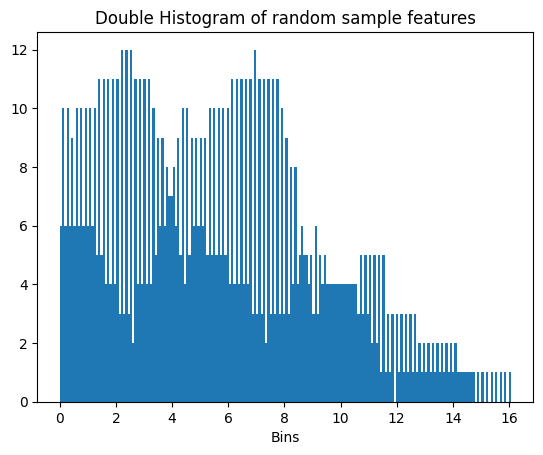

In [29]:
rand_sample_arr = cont_sample.to_numpy()

plt.hist(rand_sample_arr[:,1], bins=200)
plt.title("Double Histogram of random sample features")
plt.xlabel("Bins")
plt.show()

In [73]:
cont_sample_multidim = []
sample_points = np.random.randint(150000, len(data) + 1, 100)

In [74]:
for point in sample_points:
    new_point_X = []
    temp = pd.DataFrame(data.iloc[point])
    new_point_y = temp.loc['time_to_failure'].to_list()[0]
    
    for i in range(150000):
        temp = pd.DataFrame(data.iloc[point - i])
        temp = temp.loc['acoustic_data'].to_list()[0]
        new_point_X.append(temp)
    
    cont_sample_multidim.append([new_point_X, new_point_y])


In [72]:
len(data) > (150000*100)

True

In [80]:
continuity_sample = []

In [82]:
sample_points = [i for i in range(0, len(data), 629145)]
for point in sample_points:
    new_point_X = point
    temp = pd.DataFrame(data.iloc[point])
    new_point_y = temp.loc['time_to_failure'].to_list()[0]
    continuity_sample.append([new_point_X, new_point_y])

In [84]:
pd.DataFrame(continuity_sample).to_csv("continuity_sample_1000_2.csv", index_label=False)

In [87]:
continuity_sample_df = pd.DataFrame(continuity_sample, columns=['sample_index', 'time_to_failure'])

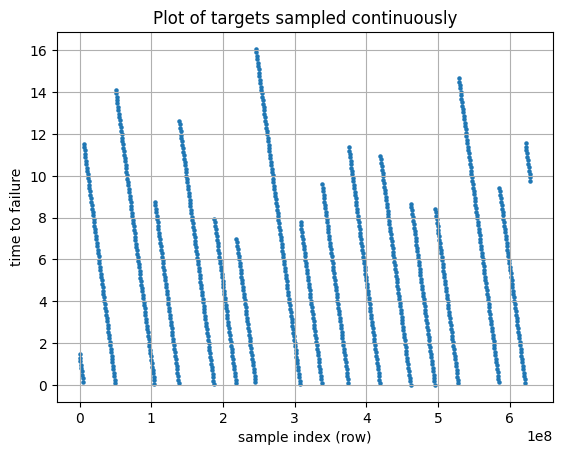

In [89]:
# Plotting the DataFrame
plt.scatter(continuity_sample_df['sample_index'], continuity_sample_df['time_to_failure'], s=5)
plt.title('Plot of targets sampled continuously')
plt.xlabel('sample index (row)')
plt.ylabel('time to failure')
plt.grid(True)
plt.show()

In [103]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [124]:
X = []
y = []
for i in range(len(cont_sample_multidim)):
    X.append(cont_sample_multidim[i][0])
    y.append(cont_sample_multidim[i][1])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [129]:
results = []

for k in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50, 75, 80]:
    #k = 10
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_test = knn.predict(X_test)
    results.append([k, mean_squared_error(y_pred_test, y_test)])


In [126]:

y_pred_test = knn.predict(X_test)
mean_squared_error(y_pred_test, y_test)

19.498293797166987

In [130]:
results

[[1, 47.605411711881075],
 [2, 33.65697880987937],
 [3, 35.74709240811988],
 [4, 34.93269408085452],
 [5, 33.65752986174273],
 [6, 33.36259949986967],
 [7, 33.30179099700144],
 [8, 32.10376550038898],
 [9, 29.44769943468122],
 [10, 28.196022621250155],
 [15, 31.03760878894618],
 [20, 29.218330529782257],
 [25, 24.707941742448625],
 [30, 23.16255472023146],
 [35, 21.019258368274325],
 [40, 19.550845384994382],
 [45, 20.90713075861618],
 [50, 19.498293797166987],
 [75, 16.491908409937217],
 [80, 16.24825977404797]]

In [133]:
pd.DataFrame(X).to_csv("test_file", index=False)

In [134]:
temp = pd.read_csv("test_file", index_col=False)

In [138]:
X[1] == (temp.iloc[1].to_list())

True